# Exp 1: Basic Operations and Algebraic Operators for Digital Images #
## 1.	Aims ##

#### 1. Establish a Python environment and install some digital image processing libraries such as scikit-image, OpenCV, PIL, and matplotlib.

#### 2. Learn how to load, display, and save images.
    
#### 3. Be familiar with some basic image processing operations such as adding noise, image type conversion, image file format conversion, etc.

#### 4. Learn how to perform algebraic operations on digital images.

## 2.	Steps and Requirements

### (1) Load, Save and Display Images.	
(a) Load a PNG image (<font style="color:red;">'images/bunny.png'</font>) with Scikit-Image. (<font style="color:blue;">Tips: ``io.imread``</font>) 

(b) Convert it to PIL image format. (<font style="color:blue;">Tips: ``Image.fromarray``</font>) 

(c) Display this image with Matplotlib. (<font style="color:blue;">Tips: ``pyplot.imshow``</font>) 

(d) Convert PIL image format to OpenCV image format, save it as a JPEG image with the quality factor of 90. (<font style="color:blue;">Tips: ``cv2.imwrite``</font>)

(e) Load the JPEG image saved above, and save it as a BMP format and a TIFF format image, respectively.

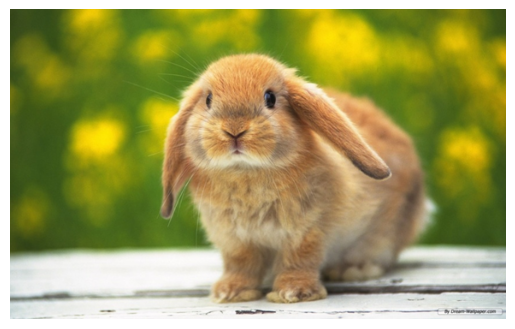

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image

# (a) Load a PNG image with Scikit-Image
image_sk = io.imread('C:/Users/LuJiaWei/Desktop/images/bunny.png')

# (b) Convert it to PIL image format
image_pil = Image.fromarray(image_sk)

# (c) Display this image with Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axes
plt.show()

# (d) Convert PIL image format to OpenCV image format and save as JPEG with quality=90
image_cv = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
jpeg_path = 'C:/Users/LuJiaWei/Desktop/images/bunny.jpeg'
cv2.imwrite(jpeg_path, image_cv, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# (e) Load the JPEG image, save it as BMP and TIFF formats
image_cv_jpeg = cv2.imread(jpeg_path)
bmp_path = 'C:/Users/LuJiaWei/Desktop/results/bunny.bmp'
tiff_path = 'C:/Users/LuJiaWei/Desktop/results/bunny.tiff'
cv2.imwrite(bmp_path, image_cv_jpeg)
cv2.imwrite(tiff_path, image_cv_jpeg)

### (2)	Display Three Individual Color Components of RGB Images. 
(a) Load an image with OpenCV. 

(b) Display the R, G, and B color component of the image, respectively. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure. 

(c) Answer the question: What are the differences between the RGB image and the R/G/B components?

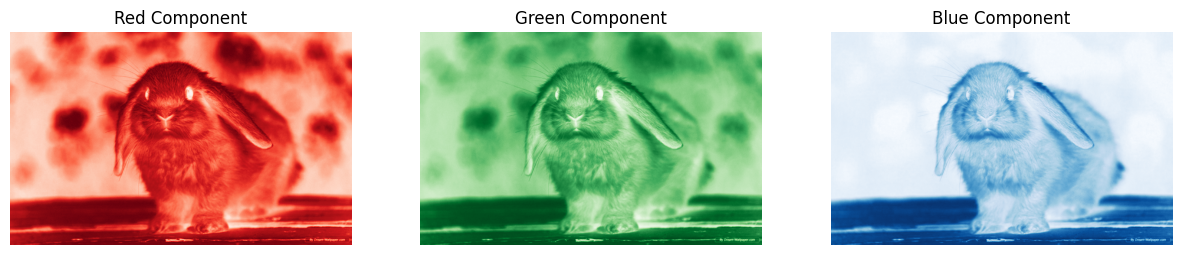

In [10]:
# (a) Load the image with OpenCV
image_cv = cv2.imread('C:/Users/LuJiaWei/Desktop/images/bunny.png')
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# (b) Extract individual R, G, and B components
R, G, B = image_cv[:, :, 0], image_cv[:, :, 1], image_cv[:, :, 2]
# Create subplots to display the components
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(R, cmap='Reds')
axs[0].set_title("Red Component")
axs[0].axis('off')
axs[1].imshow(G, cmap='Greens')
axs[1].set_title("Green Component")
axs[1].axis('off')
axs[2].imshow(B, cmap='Blues')
axs[2].set_title("Blue Component")
axs[2].axis('off')
plt.show()


### (3)	Convert Color Image to Grayscale. 

(a) Display the original Lena image and the grayscale images obtained by three grayscaling methods in the same figure. Add the corresponding title. 1)Maximum of the three components; 2) The average of the three components; 3) gray=0.30*r + 0.59*g + 0.11*b.

(b) Answer the question: What are their differences?

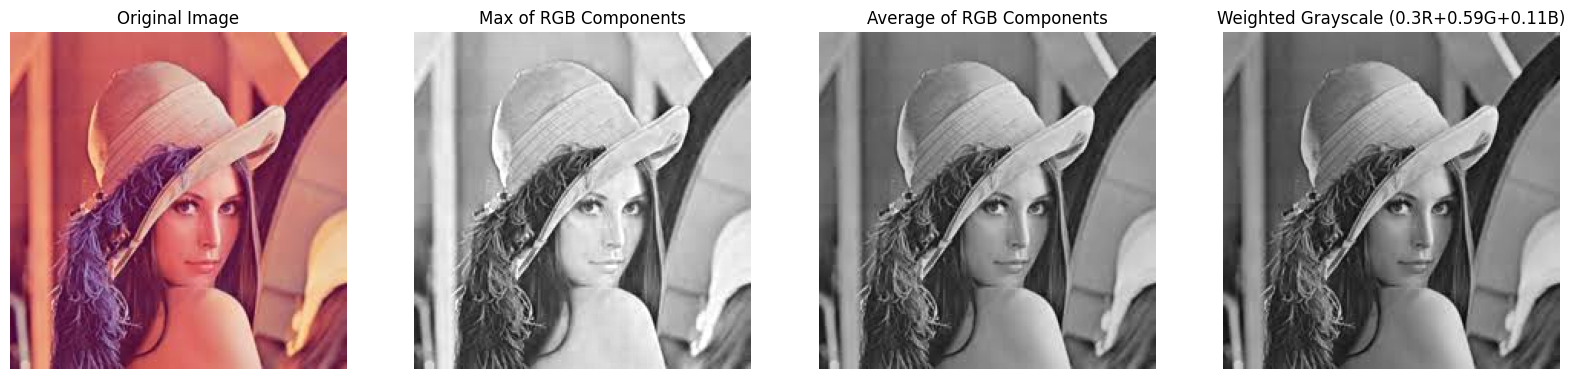

In [25]:
# (a) Convert to grayscale using three different methods
lena = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')
lena_RGB = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)
# Method 1: Maximum of the three components
gray_max = np.max(lena, axis=2)
# Method 2: Average of the three components
gray_avg = np.mean(lena, axis=2)
# Method 3: Weighted sum (commonly used in grayscale conversion)
gray_weighted = 0.30 * lena[:, :, 0] + 0.59 * lena[:, :, 1] + 0.11 * lena[:, :, 2]
# Display the original and grayscale images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# Original image
axs[0].imshow(lena_RGB)
axs[0].set_title("Original Image")
axs[0].axis('off')
# Grayscale by maximum
axs[1].imshow(gray_max, cmap='gray')
axs[1].set_title("Max of RGB Components")
axs[1].axis('off')
# Grayscale by average
axs[2].imshow(gray_avg, cmap='gray')
axs[2].set_title("Average of RGB Components")
axs[2].axis('off')
# Grayscale by weighted sum
axs[3].imshow(gray_weighted, cmap='gray')
axs[3].set_title("Weighted Grayscale (0.3R+0.59G+0.11B)")
axs[3].axis('off')
plt.show()

### (4)	Image Cropping. 

(a) Load an RGB image ('images/lena.jpg'). 

(b) Select the 128x128 central region of the image. 

(c) Display the full image and its central part. 

(d) Save the central part as an image file in the same format as the full-size image.

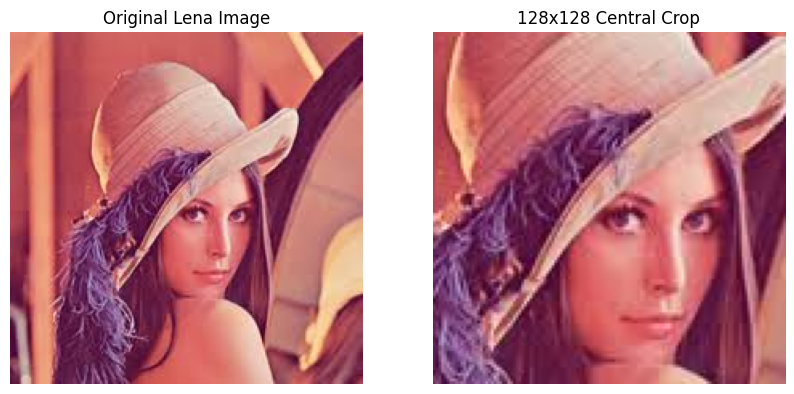

True

In [12]:
# (a) Load the RGB image (Lena)
lena = cv2.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# (b) Select the 128x128 central region
h, w, _ = lena.shape
center_x, center_y = w // 2, h // 2
crop_size = 128
x1, y1 = center_x - crop_size // 2, center_y - crop_size // 2
x2, y2 = center_x + crop_size // 2, center_y + crop_size // 2
lena_cropped = lena[y1:y2, x1:x2]

# (c) Display the full image and cropped image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(lena)
axs[0].set_title("Original Lena Image")
axs[0].axis('off')
axs[1].imshow(lena_cropped)
axs[1].set_title("128x128 Central Crop")
axs[1].axis('off')
plt.show()

# (d) Save the cropped image in the same format as the full image
cropped_path = 'C:/Users/LuJiaWei/Desktop/results/lena_cropped.jpg'
cv2.imwrite(cropped_path, cv2.cvtColor(lena_cropped, cv2.COLOR_RGB2BGR))


### (5)	Adding Noise to Image. 

(a) Load an RGB image with Scikit-Image ('images/lena.jpg').

(b) Add 1) Gaussian noise, 2) salt noise, 3) pepper noise, 4) salt&pepper noise, and 5) speckle noise to it. The parameters can be chosen by yourself. (<font style="color:blue;">Tips: You may use ``random_noise`` in the ``util`` module of Scikit-Image</font>)

(c) Display these six images (including the original noiseless image) in the same figure and add the corresponding title.

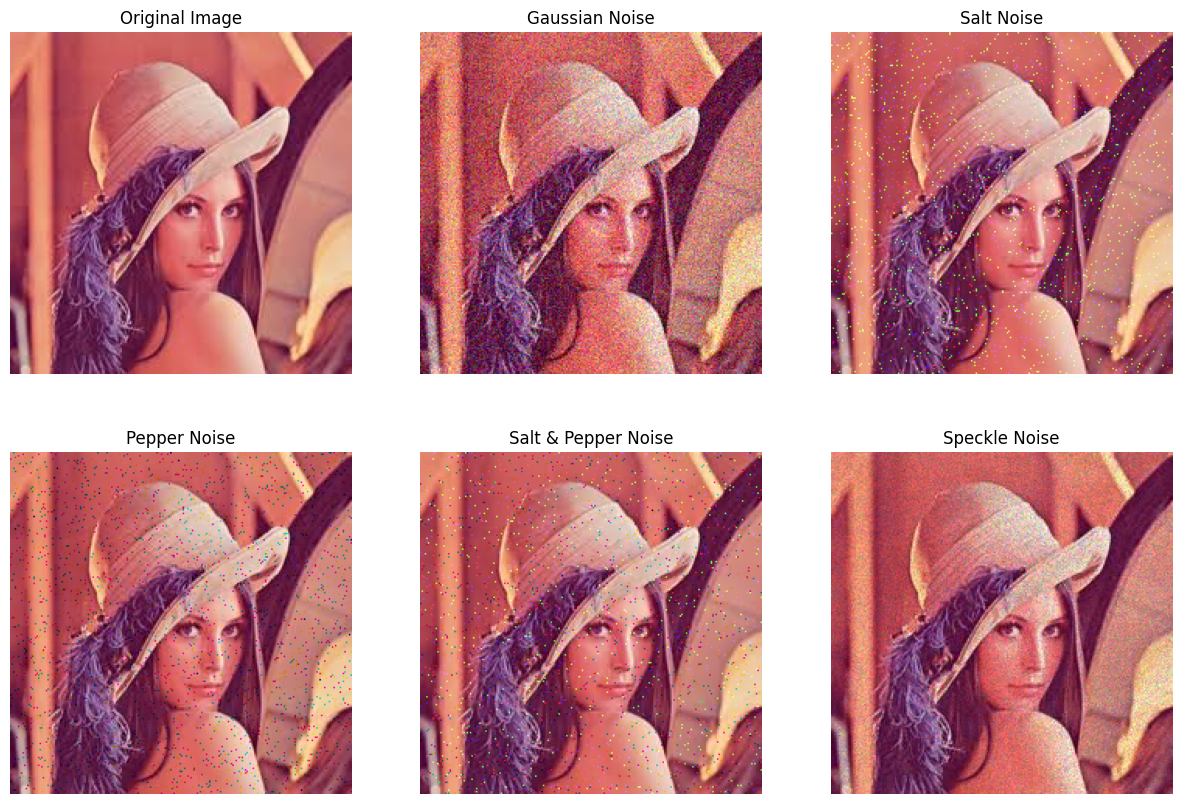

In [4]:
from skimage import io, util
from skimage.util import random_noise
# (a) Load the RGB image (Lena)
lena = io.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')

# (b) Add different types of noise
noisy_gaussian = random_noise(lena, mode='gaussian')
noisy_salt = random_noise(lena, mode='salt', amount=0.02)
noisy_pepper = random_noise(lena, mode='pepper', amount=0.02)
noisy_saltpepper = random_noise(lena, mode='s&p', amount=0.02)
noisy_speckle = random_noise(lena, mode='speckle')
# Convert noisy images to uint8 format
noisy_gaussian = (noisy_gaussian * 255).astype(np.uint8)
noisy_salt = (noisy_salt * 255).astype(np.uint8)
noisy_pepper = (noisy_pepper * 255).astype(np.uint8)
noisy_saltpepper = (noisy_saltpepper * 255).astype(np.uint8)
noisy_speckle = (noisy_speckle * 255).astype(np.uint8)

# (c) Display all six images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(lena)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')
axs[0, 1].imshow(noisy_gaussian)
axs[0, 1].set_title("Gaussian Noise")
axs[0, 1].axis('off')
axs[0, 2].imshow(noisy_salt)
axs[0, 2].set_title("Salt Noise")
axs[0, 2].axis('off')
axs[1, 0].imshow(noisy_pepper)
axs[1, 0].set_title("Pepper Noise")
axs[1, 0].axis('off')
axs[1, 1].imshow(noisy_saltpepper)
axs[1, 1].set_title("Salt & Pepper Noise")
axs[1, 1].axis('off')
axs[1, 2].imshow(noisy_speckle)
axs[1, 2].set_title("Speckle Noise")
axs[1, 2].axis('off')
plt.show()

### (6)	Image Denoising by Averaging. 

(a) Load an RGB image. 

(b) Add Gaussian noise with a mean value of 0 and a variance of 0.1 to it. 

(c) Display and compare the images before and after adding noise. 

(d) Use the ``for`` loop to add 3, 30, and 300 images with random Gaussian noise and find their average value, respectively. 

(e) Display these averaged images in the same figure. Add corresponding titles, and compare the results.

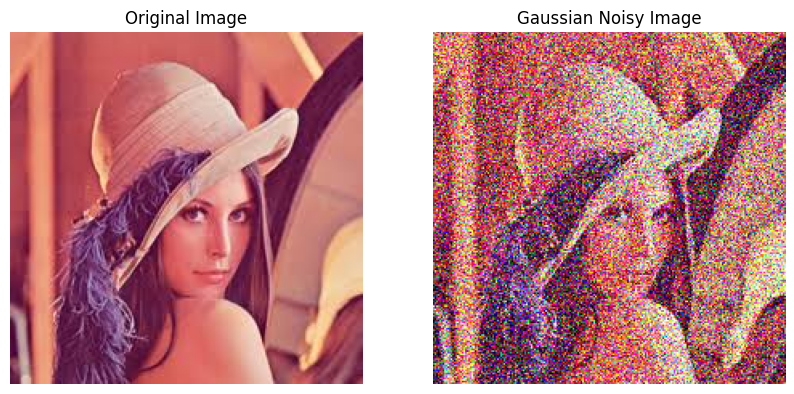

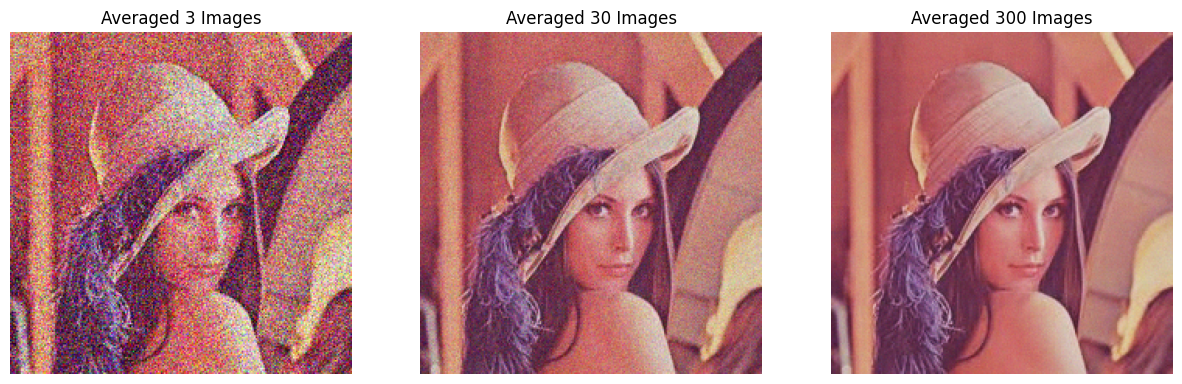

In [16]:
# (a) Load an RGB image
image = io.imread('C:/Users/LuJiaWei/Desktop/images/lena.jpg')

# (b) Add Gaussian noise (mean=0, variance=0.1)
noisy_image = random_noise(image, mode='gaussian', mean=0, var=0.1)
noisy_image = (noisy_image * 255).astype(np.uint8)

# (c) Display and compare the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(noisy_image)
ax[1].set_title("Gaussian Noisy Image")
ax[1].axis('off')
plt.show()

# (d) Generate denoised images by averaging multiple noisy images
def average_noisy_images(num_images):
    noisy_images = np.zeros_like(image, dtype=np.float64)
    for _ in range(num_images):
        noisy = random_noise(image, mode='gaussian', mean=0, var=0.1)
        noisy_images += noisy
    noisy_images /= num_images
    return (noisy_images * 255).astype(np.uint8)

avg_3 = average_noisy_images(3)
avg_30 = average_noisy_images(30)
avg_300 = average_noisy_images(300)

# (e) Display the denoised images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(avg_3)
ax[0].set_title("Averaged 3 Images")
ax[0].axis('off')
ax[1].imshow(avg_30)
ax[1].set_title("Averaged 30 Images")
ax[1].axis('off')
ax[2].imshow(avg_300)
ax[2].set_title("Averaged 300 Images")
ax[2].axis('off')
plt.show()


### (7)	Image Algebraic Operations. 

(a) Download two pictures by yourself, and load these two pictures with OpenCV. 

(b) Perform algebraic operations of addition and subtraction (<font style="color:blue;">Tips : Pay attention to the size and type of the image during the calculation. If they are different, the larger image should be cropped or scaled</font>).

(c) Display the images before and after processing.

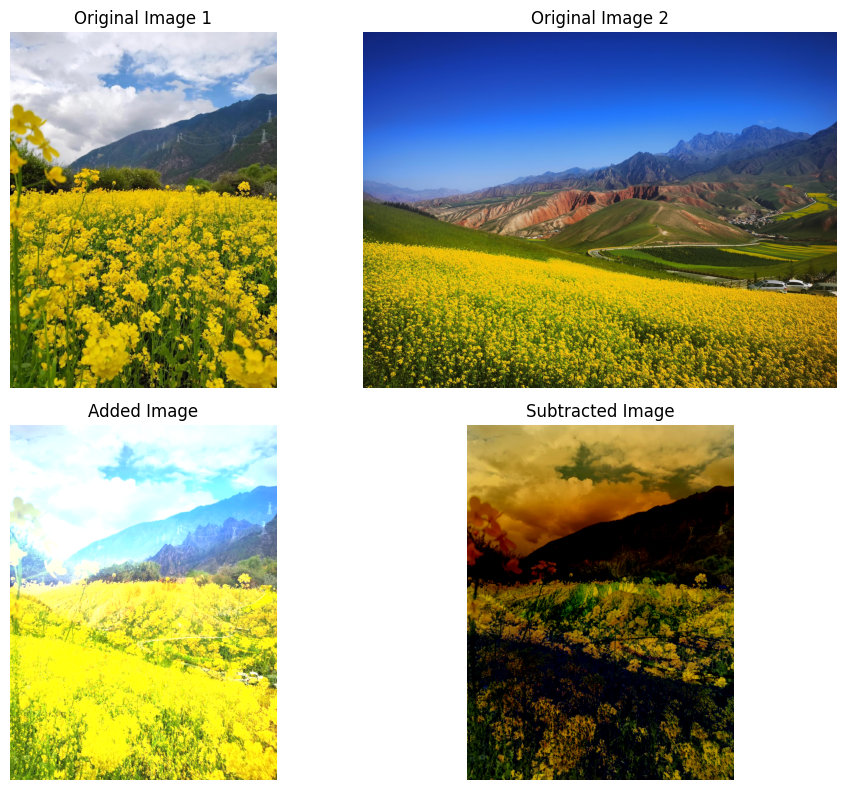

In [8]:
def resize_images(img1, img2):
    height, width = min(img1.shape[:2], img2.shape[:2])
    img1_resized = cv2.resize(img1, (width, height))
    img2_resized = cv2.resize(img2, (width, height))
    return img1_resized, img2_resized

# (a)Load images
img1 = cv2.imread('C:/Users/LuJiaWei/Desktop/image1.jpeg')  
img2 = cv2.imread('C:/Users/LuJiaWei/Desktop/image2.jpeg')  
# Convert to RGB for displaying
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# (b)Resize images to match dimensions
img1_resized, img2_resized = resize_images(img1, img2)
# Perform addition and subtraction
added_image = cv2.add(img1_resized, img2_resized)
subtracted_image = cv2.subtract(img1_resized, img2_resized)
# Convert processed images to RGB
added_image_rgb = cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB)
subtracted_image_rgb = cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB)

# Display results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(img1_rgb)
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(img2_rgb)
axs[0, 1].set_title('Original Image 2')
axs[1, 0].imshow(added_image_rgb)
axs[1, 0].set_title('Added Image')
axs[1, 1].imshow(subtracted_image_rgb)
axs[1, 1].set_title('Subtracted Image')
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()


### (8)	Text adding. 

(a) Load the Lena image with OpenCV. 

(b) Employ a red rectangle to mark the 64x64 rectangle in the middle of image. (<font style="color:blue;">Tips: You may use ``cv2.rectangle``</font>) 

(c) Adding some black text on it. (<font style="color:blue;">Tips: You may use``cv2.putText``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_8.png) 
<center><font style="color:red;">** Figure 1. The result of adding content to Lean image** </font></center>

In [13]:
# Load the Lena image
image_path = "C:/Users/LuJiaWei/Desktop/images/lena.jpg"
image = cv2.imread(image_path)
# Get image dimensions
h, w, _ = image.shape
# Define rectangle coordinates (centered 64x64 region)
x1, y1 = (w//2 - 32, h//2 - 32)
x2, y2 = (w//2 + 32, h//2 + 32)
# Draw a red rectangle
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
# Add black text "eye" inside the rectangle
cv2.putText(image, "eye", (x1 + 5, y1 + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
# Save the result
cv2.imwrite('C:/Users/LuJiaWei/Desktop/results/lina_text_add.jpg', image)


True

### (9)	Adding image mask. 

(a) Load the Lena image with OpenCV. 

(b) Adding a circular mask on the Lena image. (<font style="color:blue;">Tips: You may use``numpy.ogrid``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_9.png) 
<center><font style="color:red;">** Figure 2. The result of adding binary mask to Lean image** </font></center>

In [17]:
# Load the Lena image
image_path = "C:/Users/LuJiaWei/Desktop/images/lena.jpg"
image = cv2.imread(image_path)
# Get image dimensions
h, w, _ = image.shape
# Create a circular mask
mask = np.zeros((h, w), dtype=np.uint8)
center_x, center_y = w // 2, h // 2
radius = min(w, h) // 2  # Half of the smallest dimension
# Use OpenCV to draw a filled white circle on the mask
cv2.circle(mask, (center_x, center_y), radius, (255), -1)
# Apply mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)
# Save the result
cv2.imwrite('C:/Users/LuJiaWei/Desktop/results/lina_image_add.jpg', masked_image)

True

### (10)	Capture Images by Laptop Camera with OpenCV. (``Bonus Task``)

(a) Read the video stream from the laptop camera.(For more details check [this](http://www.1zlab.com/wiki/python-opencv-tutorial/opencv-read-usb-camera-image/)) 

(b) Implement Time-lapse photography.(It can be used to record the whole process of the evaporation of water droplets in the cup. <font style="color:blue;"> Tips: You may use``time.sleep``</font>)

(c) Generate corresponding MP4 video or GIF image.

In [18]:
import time
import imageio
# Set up video capture from the laptop camera
cap = cv2.VideoCapture(0)  # 0 is the default camera
cap.set(3, 640)  # Set width
cap.set(4, 480)  # Set height

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

frames = []  # Store captured frames

print("Press 'q' to stop capturing.")

try:
    while True:
        ret, frame = cap.read()  # Read frame from camera
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Display the captured frame
        cv2.imshow("Time-Lapse Capture", frame)

        # Save frame every 2 seconds (adjust as needed)
        frames.append(frame)
        time.sleep(2)

        # Press 'q' to stop capturing
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Time-lapse capture stopped.")

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()

# Save frames as an MP4 video
output_video = "C:/Users/LuJiaWei/Desktop/results/timelapse.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 0.5  # Adjust based on time-lapse interval

if frames:
    h, w, _ = frames[0].shape
    out = cv2.VideoWriter(output_video, fourcc, fps, (w, h))

    for frame in frames:
        out.write(frame)
    
    out.release()
    print(f"Time-lapse video saved as {output_video}")

# Save frames as a GIF
output_gif = "C:/Users/LuJiaWei/Desktop/results/timelapse.gif"
imageio.mimsave(output_gif, [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in frames], duration=2)
print(f"GIF saved as {output_gif}")


Press 'q' to stop capturing.
Time-lapse video saved as C:/Users/LuJiaWei/Desktop/results/timelapse.mp4
GIF saved as C:/Users/LuJiaWei/Desktop/results/timelapse.gif


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Submit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.